In [34]:
import numpy as np
import pandas as pd

## Random

In [35]:
v = np.array([8,3,3])
vt = np.transpose(v)

In [36]:
np.matmul(vt,v)

82

In [37]:
np.dot(v,v)

82

In [38]:
v[0]*v[0] + v[1]*v[1] + v[2]*v[2]

82

## Coordenadas esféricas

In [39]:
v = [1,0,0]

theta = np.arctan2(np.linalg.norm(v[:1]),v[2])
print(theta)

1.5707963267948966


## Plot Data

Open CSV file in "../data/hak_csv_20220604_213001.csv"


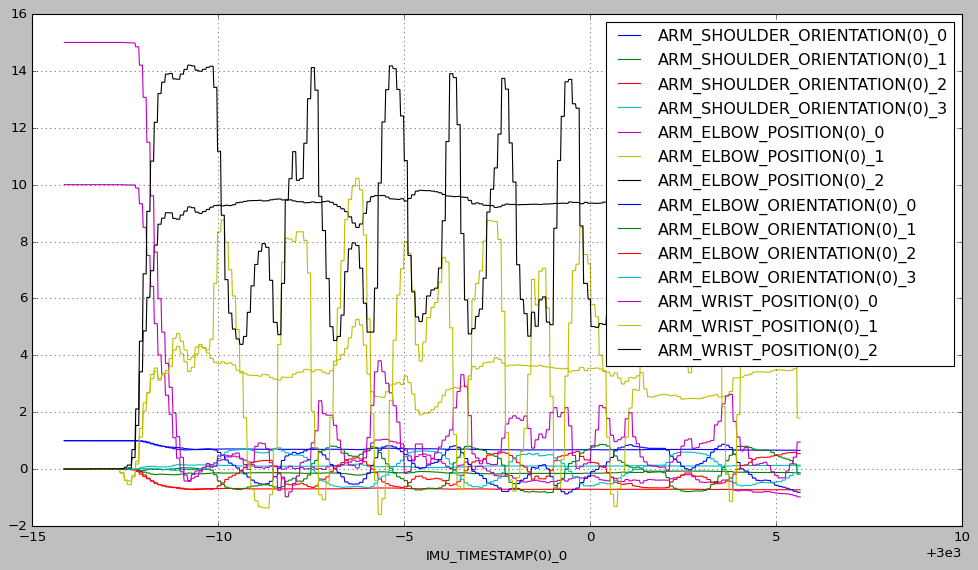

In [40]:
import os
import matplotlib.pyplot as plt

DATA_DIR = "../data/"

dirs = os.listdir(DATA_DIR)
dirs.sort(reverse=True)

for d in dirs:
    if 'tst' not in d:
        path = DATA_DIR+d 
        break

print(f"Open CSV file in \"{path}\"")
df = pd.read_csv(path)

# Adjust plot style
plt.figure(figsize=(15, 8), dpi=80)
plt.grid(True)
plt.style.use('classic')

# Show plot
for col in df.columns[1:]:
    plt.plot(df[df.columns[0]], df[col])
plt.legend(df.columns[1:])
plt.xlabel(df.columns[0])
plt.show()



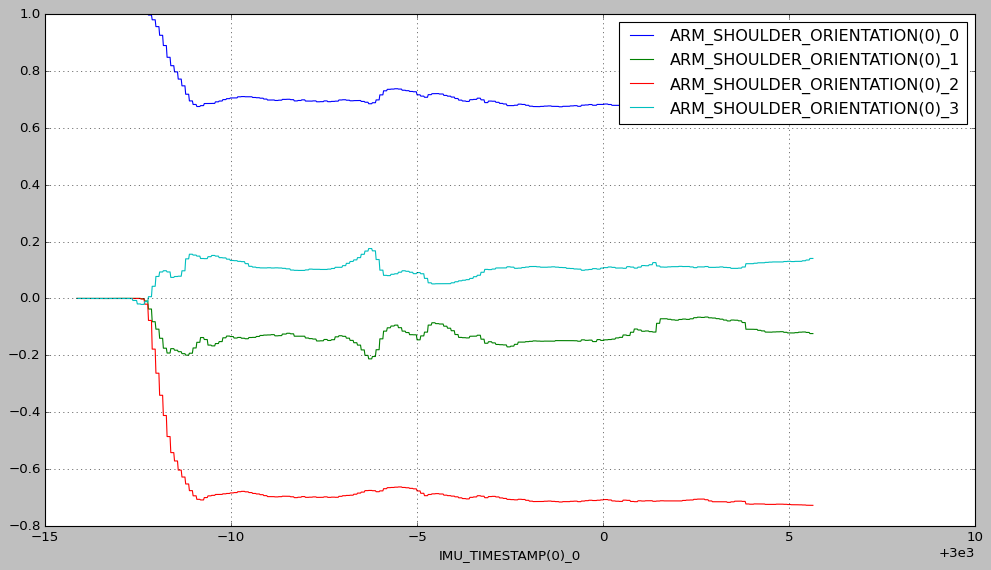

In [43]:
# Adjust plot style
plt.figure(figsize=(15, 8), dpi=80)
plt.grid(True)
plt.style.use('classic')

# Show alternative plot
# columns = ("ARM_SHOULDER_ORIENTATION(0)_0", "ARM_SHOULDER_ORIENTATION(0)_1", "ARM_SHOULDER_ORIENTATION(0)_2", "ARM_SHOULDER_ORIENTATION(0)_3")
columns = ("ARM_ELBOW_ORIENTATION(0)_0", "ARM_ELBOW_ORIENTATION(0)_1", "ARM_ELBOW_ORIENTATION(0)_2", "ARM_ELBOW_ORIENTATION(0)_3")
legend = []
for col in columns:
    if col in df.columns[1:]:
        plt.plot(df[df.columns[0]], df[col])
        legend.append(col)
plt.legend(legend)
plt.xlabel(df.columns[0])
plt.show()